In [1]:
#Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and processing

In [2]:
# Importing the data from .csv  

df = pd.read_csv('Salary Data.csv')

In [3]:
# Inspecting the first 5 rows of the data 
df.head(100)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
95,39.0,Female,Bachelor's,Training Specialist,12.0,65000.0
96,47.0,Male,PhD,Research Scientist,22.0,160000.0
97,26.0,Male,Bachelor's,Junior Software Developer,1.0,35000.0
98,38.0,Female,Master's,Public Relations Manager,10.0,90000.0


In [4]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
# Checking the rows and columns of the data
df.shape

(375, 6)

In [6]:
# Checking the null values in the dataset
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
# Dropping all the missing values
df = df.dropna()

In [8]:
# Checking the number of columns and total missing value after removing NaN
print(f'The total columns after removing the missing value of the data is {df.shape[0]}.')
df.isna().sum()

The total columns after removing the missing value of the data is 373.


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
# Checking the distribution of the categorical data
print(df['Gender'].value_counts())
print(df['Education Level'].value_counts())

Gender
Male      194
Female    179
Name: count, dtype: int64
Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64


In [10]:
# Checkign the different numbers of Job Title
df['Job Title'].nunique()

174

In [11]:
# Removing the Job Title from the categorical data as it has too many different values
df = df.drop(columns = 'Job Title')

## Dimension Reduction

In [12]:
# Changing the Object to numerical values in Gender column 

gender = pd.get_dummies(df['Gender'], drop_first = True)
gender['Male'] = gender['Male'].apply(lambda x: 1 if x == True else 0)
gender

,Male
0,1
1,0
2,1
3,0
4,1
...,...
370,0
371,1
372,0
373,1


In [13]:
# Changing the Object to numerical values in Education Level column 

edu_level = pd.get_dummies(df['Education Level'], drop_first = False)
edu_level["Bachelor's"] = edu_level["Bachelor's"].apply(lambda x: 1 if x else 0)
edu_level["Master's"] = edu_level["Master's"].apply(lambda x: 1 if x else 0)
edu_level["PhD"] = edu_level["PhD"].apply(lambda x: 1 if x else 0)
edu_level

,Bachelor's,Master's,PhD
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
370,1,0,0
371,0,1,0
372,1,0,0
373,1,0,0


In [14]:
# Concatinating all the columns with numerical values
df = pd.concat([df, gender, edu_level], axis = 1)
df

,Age,Gender,Education Level,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,Male,Bachelor's,5.0,90000.0,1,1,0,0
1,28.0,Female,Master's,3.0,65000.0,0,0,1,0
2,45.0,Male,PhD,15.0,150000.0,1,0,0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0,1,0,0
4,52.0,Male,Master's,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0,1,0,0
371,43.0,Male,Master's,19.0,170000.0,1,0,1,0
372,29.0,Female,Bachelor's,2.0,40000.0,0,1,0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1,1,0,0


In [15]:
# Removing all the columns with Object or non numerical values
df.drop(['Gender','Education Level'], axis = 1, inplace = True)

In [16]:
df

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,1,1,0,0
1,28.0,3.0,65000.0,0,0,1,0
2,45.0,15.0,150000.0,1,0,0,1
3,36.0,7.0,60000.0,0,1,0,0
4,52.0,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,0,1,0,0
371,43.0,19.0,170000.0,1,0,1,0
372,29.0,2.0,40000.0,0,1,0,0
373,34.0,7.0,90000.0,1,1,0,0


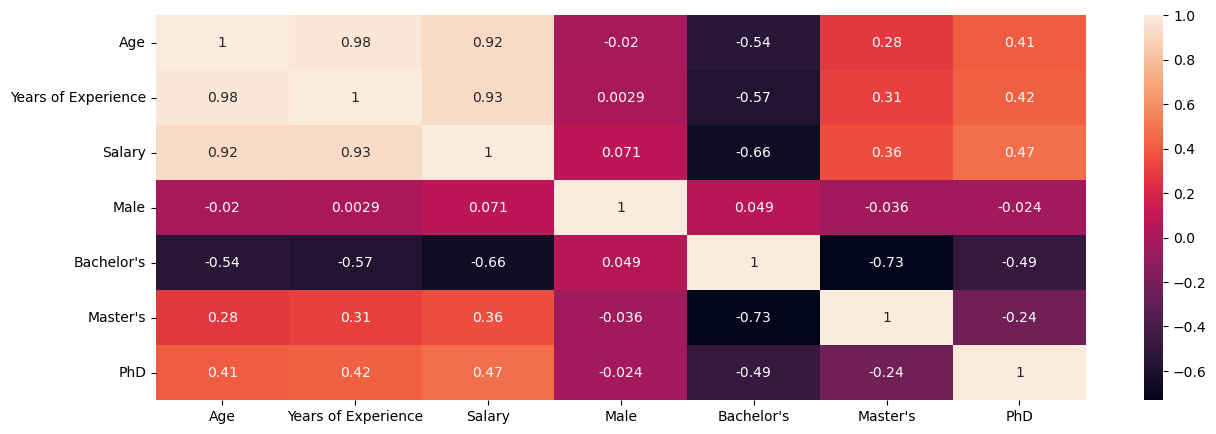

In [17]:
# Checking the co-relation between all the columns

plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above diagram we can see
1) Age and Work experience are highly co-related
2) Salary and work experience are highly co-related
3) Age and Salary are Highly co-related
4) Salary and education level is not very highly co-related

### Splitting the Data into Training Data and Testing Data

In [18]:
# First we split the data and the Target

X = df.drop('Salary',axis =1)
Y = df['Salary']   # As Salary is the Target column

In [19]:
X

,Age,Years of Experience,Male,Bachelor's,Master's,PhD
0,32.0,5.0,1,1,0,0
1,28.0,3.0,0,0,1,0
2,45.0,15.0,1,0,0,1
3,36.0,7.0,0,1,0,0
4,52.0,20.0,1,0,1,0
...,...,...,...,...,...,...
370,35.0,8.0,0,1,0,0
371,43.0,19.0,1,0,1,0
372,29.0,2.0,0,1,0,0
373,34.0,7.0,1,1,0,0


In [20]:
Y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [21]:
# Now we can split the data into X_train,X_test,Y_train and Y_test

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [23]:
X_train

,Age,Years of Experience,Male,Bachelor's,Master's,PhD
146,42.0,16.0,0,0,0,1
222,33.0,7.0,1,1,0,0
119,35.0,10.0,1,0,1,0
80,36.0,8.0,1,1,0,0
88,46.0,21.0,1,0,1,0
...,...,...,...,...,...,...
204,36.0,7.0,1,1,0,0
256,34.0,6.0,0,0,1,0
72,45.0,16.0,1,0,0,1
236,37.0,9.0,0,1,0,0


In [24]:
X_test

,Age,Years of Experience,Male,Bachelor's,Master's,PhD
67,31.0,5.0,0,1,0,0
348,28.0,1.0,0,1,0,0
343,41.0,14.0,1,1,0,0
295,33.0,4.0,1,1,0,0
90,36.0,11.0,1,0,0,1
...,...,...,...,...,...,...
247,31.0,3.0,1,1,0,0
162,30.0,3.0,0,1,0,0
209,30.0,2.0,0,1,0,0
122,33.0,5.0,0,1,0,0


In [25]:
Y_train

146    150000.0
222    100000.0
119    120000.0
80      70000.0
88     135000.0
         ...   
204     90000.0
256    100000.0
72     190000.0
236    100000.0
37     115000.0
Name: Salary, Length: 261, dtype: float64

In [26]:
Y_test

67      45000.0
348     35000.0
343    150000.0
295     60000.0
90     120000.0
         ...   
247     50000.0
162     45000.0
209     40000.0
122     50000.0
336     40000.0
Name: Salary, Length: 112, dtype: float64

### Model Prediction witn Training Datset

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()
model = lm.fit(X_train, Y_train)

In [28]:
train_predicted_salary = model.predict(X_train)

In [29]:
# R squared error 
error_score = metrics.r2_score(Y_train,train_predicted_salary)
print(f'Error Score : {error_score}')

Error Score : 0.8865692301663425


### Visualize the actual and predicted Salaries

In [30]:
plt.scatter(Y_train,predicted_salary,c='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary')

NameError: name 'predicted_salary' is not defined

# Model Prediction with Testing Dataset

In [ ]:
lm = LinearRegression()
model = lm.fit(X_test, Y_test)

In [ ]:
test_predicted_salary = model.predict(X_test)

In [ ]:
# R squared error 
error_score = metrics.r2_score(Y_test,test_predicted_salary)
print(f'Error Score : {error_score}')

In [ ]:
plt.scatter(Y_test,predicted_salary,c='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary')